In [1]:
import sys
import cohorts
import pandas as pd
import numpy as np

## Testing setters and attributes

In [2]:
print(cohorts.Cohort.__doc__)


	Patient cohort object for patient proteomics data.

	Dataframes, variables, and functions facilitating the processing, analysis, and integration of the cohort data.

	Parameters
	----------
	cohort: str
		name of the patient cohort

	file_dir: str
		directory where replicate dataframe and 
		sample group membership dataframe file names are located

	replicates_file: str
		name of the replicates dataframe file

		A proteins x B replicates
		tab delimited

		replicate = "SampleName" + "_Rep[0-9]"

	sample_groups_file: str
		name of the sample group file

		N groups x M samples

		sample = "SampleName"

	data_dir: str
		directory where extra data files are located
		
	uniprot_file: str
		name of the uniprot database flat file located in data_dir

	Examples
	--------
	>>>c = cohorts.Cohort(cohort='cohort_name',
		file_dir="path/to/files/"
		replicates_file="file_name",
		sample_groups_file="sample_groups_file_name",
		data_dir="path/to/data/dir/",
		uniprot_file="uniprot_flat_file"
		)
	

In [3]:
top = "~/Research/Projects/exosome_pgf/"
file_dirs ={ 'cumc' : top+"cumc/data/", 'cedar' : top+"cedarsinai/data/", 'paris' : top+"paris/data/"}
replicates_files = { 'cumc' : "df_replicates.tab", 'cedar' : "df_replicates.tab", 'paris' : "df_replicates.tab"}
replicate_groups_files = { 'cumc' : "df_replicate_groups.tab", 'cedar' : "df_replicate_groups.tab", 'paris' : "df_replicate_groups.tab"}
sample_groups_files = { 'cumc' : "df_sample_groups_v2.tab", 'cedar' : "df_sample_groups.tab", 'paris' : "df_sample_groups.tab"}
cohort = 'cumc'
c = cohorts.Cohort(cohort=cohort,
                   data_dir="../data/",file_dir=file_dirs[cohort],
                   replicates_file=replicates_files[cohort],
                   sample_groups_file=sample_groups_files[cohort],
                   uniprot_file="uniprot-all_20171124.tab.gz")
print(c.cwd)
print(c.data_dir)
print(c.cohort)
print(c.replicates)
print(c.sample_replicate_dictionary) 
print(c.samples)
print(c.groups)
print(len(c.proteins))
display(c.raw_samples.head())
display(c.raw_replicates.head())
display(c.replicate_groups.head())
display(c.sample_groups.head())
display(c.tidy_sample_groups.head())

/Users/npg2108/GitHub/cohorts
../data/
cumc
['53688_Rep1', '53688_Rep2', '53688_Rep3', '53688_Rep4', '54109_Rep1', '54109_Rep2', '54109_Rep3', '54109_Rep4', '54314_Rep1', '54314_Rep2', '54314_Rep3', '54314_Rep4', '54793_Rep1', '54793_Rep2', '54793_Rep3', '54793_Rep4', '55175_Rep1', '55175_Rep2', '55175_Rep3', '55175_Rep4', '56191_Rep1', '56191_Rep2', '56191_Rep3', '56191_Rep4', '56603_Rep1', '56603_Rep2', '56603_Rep3', '56603_Rep4', '56767_Rep1', '56767_Rep2', '56767_Rep3', '56767_Rep4', '62128_Rep1', '62128_Rep2', '62128_Rep3', '62128_Rep4', '53190_Rep1', '53190_Rep2', '53190_Rep3', '53190_Rep4', '53488_Rep1', '53488_Rep2', '53488_Rep3', '53488_Rep4', '56118_Rep1', '56118_Rep2', '56118_Rep3', '56118_Rep4', '57268_Rep1', '57268_Rep2', '57268_Rep3', '57268_Rep4', '57267_Rep1', '57267_Rep2', '57267_Rep3', '57267_Rep4', '57270_Rep1', '57270_Rep2', '57270_Rep3', '57270_Rep4', '57269_Rep1', '57269_Rep2', '57269_Rep3', '57269_Rep4']
{'53688': ['53688_Rep1', '53688_Rep2', '53688_Rep3', '53688

/anaconda/envs/cohorts_test/lib/python3.6/site-packages/pandas/core/indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,53688,54109,54314,54793,55175,56191,56603,56767,62128,53190,53488,56118,57268,57267,57270,57269
P61981,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.60700,0.30975,0.38400,0.84325,0.36050,1.25550,0.40400,0.25225
E7EX29,1.21800,1.00975,1.05950,1.47275,1.88975,1.45750,1.2900,1.41650,0.95400,0.86425,0.79350,0.83100,1.63625,1.12900,0.72575,2.06750
P62191,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.23900,0.13550,0.10050,0.18425,0.26975,0.34650,0.59900,0.09350
Q99460,1.07750,0.28000,0.28375,0.31650,0.00000,0.00000,0.0000,0.00000,0.30775,0.95100,0.34975,0.32125,0.00000,0.00000,0.00000,0.00000
P52209,0.85025,0.48075,0.60300,0.92175,1.05500,0.41375,0.5995,0.88275,0.76325,0.80450,0.81400,1.07575,0.99675,0.81175,0.55875,2.21100


,53688_Rep1,53688_Rep2,53688_Rep3,53688_Rep4,54109_Rep1,54109_Rep2,54109_Rep3,54109_Rep4,54314_Rep1,54314_Rep2,...,57267_Rep3,57267_Rep4,57270_Rep1,57270_Rep2,57270_Rep3,57270_Rep4,57269_Rep1,57269_Rep2,57269_Rep3,57269_Rep4
P61981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.750,0.866,NaN,NaN,0.462,0.547,NaN,NaN
E7EX29,1.142,1.317,1.556,0.857,1.150,1.080,0.804,1.005,0.930,1.235,...,1.528,1.731,0.716,0.626,0.701,0.860,1.676,1.857,1.503,3.234
P62191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.396,NaN,NaN,NaN,0.374,NaN,NaN
Q99460,NaN,NaN,4.310,NaN,NaN,NaN,1.120,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P52209,1.278,1.160,0.335,0.628,0.461,0.406,0.728,0.328,0.787,0.731,...,0.921,1.144,0.738,0.637,0.332,0.528,1.805,2.465,2.613,1.961


,53190_Rep1,53190_Rep2,53190_Rep3,53190_Rep4,53488_Rep1,53488_Rep2,53488_Rep3,53488_Rep4,53688_Rep1,53688_Rep2,...,57269_Rep3,57269_Rep4,57270_Rep1,57270_Rep2,57270_Rep3,57270_Rep4,62128_Rep1,62128_Rep2,62128_Rep3,62128_Rep4
NL,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
PGD,1,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
RV,1,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
LV,1,1,1,1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
vasoplegia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,53688,54109,54314,54793,55175,56191,56603,56767,62128,53190,53488,56118,57268,57267,57270,57269
NL,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
PGD,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
RV,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
LV,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1
vasoplegia,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


,Samples,Groups
0,NL,53688
5,NL,54109
10,NL,54314
15,NL,54793
20,NL,55175


## testing analysis functions

In [4]:
c.set_ref('NL')
c.set_treat('PGD')
c.set_replicates_hq()
c.set_trans_replicates_hq()
c.set_samples_hq(uniprot_annot=True)
c.manual_feature_extraction(c.samples_hq)
display(c.data['mfe']['main']['df_len'])
#load raw and sample group dataframes

NL/PGD
NL/RV
NL/LV
NL/vasoplegia


,NL/PGD,NL/RV,NL/LV,NL/vasoplegia
allq_allq,535,535,535,546
allq_allnotq,63,63,63,69
allq_mixed,17,17,17,0
allnotq_allq,69,69,69,69
allnotq_allnotq,76,76,76,76
allnotq_mixed,0,0,0,0
mixed_allq,15,15,15,63
mixed_allnotq,0,0,0,35
mixed_mixed,83,83,83,0


In [5]:
display(c.data['mfe']['helper']['allq_allq']['df_len'])
display(c.data['mfe']['helper']['allnotq_allnotq']['df_len'])
display(c.data['mfe']['helper']['allq_allnotq']['df_len'])
display(c.data['mfe']['helper']['allnotq_allq']['df_len'])

,NL/PGD,NL/RV,NL/LV,NL/vasoplegia
NL/PGD,0,0,0,0
NL/RV,0,0,0,0
NL/LV,0,0,0,0
NL/vasoplegia,11,11,11,0


,NL/PGD,NL/RV,NL/LV,NL/vasoplegia
NL/PGD,0,0,0,0
NL/RV,0,0,0,0
NL/LV,0,0,0,0
NL/vasoplegia,0,0,0,0


,NL/PGD,NL/RV,NL/LV,NL/vasoplegia
NL/PGD,0,0,0,0
NL/RV,0,0,0,0
NL/LV,0,0,0,0
NL/vasoplegia,6,6,6,0


,NL/PGD,NL/RV,NL/LV,NL/vasoplegia
NL/PGD,0,0,0,0
NL/RV,0,0,0,0
NL/LV,0,0,0,0
NL/vasoplegia,0,0,0,0


In [6]:
ht = c.hypothesis_testing(df=c.samples_hq,df_groups=c.sample_groups)
ht

,Protein,Test,Pvalue,Statistic
0,A0A075B6H9,t-test,0.159626,1.485322
1,A0A075B6I0,t-test,0.641305,0.476162
2,A0A075B6I1,t-test,0.315327,-1.041432
3,A0A075B6I4,t-test,0.000051,5.744282
4,A0A075B6I9,t-test,0.505980,0.682629
5,A0A075B6J1,t-test,0.618797,0.508829
6,A0A075B6J6,t-test,0.194716,1.361986
7,A0A075B6J9,t-test,0.926996,0.093289
8,A0A075B6K0,t-test,0.370359,-0.925552
9,A0A075B6K2,t-test,0.295790,1.086082


## plotting with object data

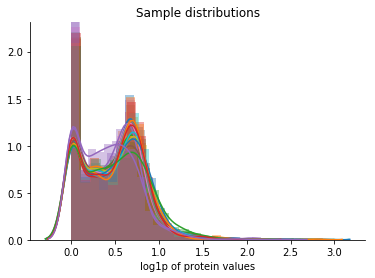

In [7]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
df_samples = c.raw_samples.apply(lambda x: np.log1p(x))
for n in range(0,15,1):
    sns.distplot(df_samples.iloc[:,n],label=df_samples.index.values[n])
plt.xlabel('log1p of protein values')
plt.title('Sample distributions')
sns.despine()

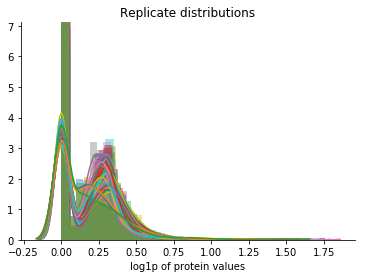

In [8]:
df_replicates = c.raw_replicates.fillna(0).apply(lambda x: np.log10(x+1))
for n in range(0,len(df_replicates.columns)-1,1):
    sns.distplot(df_replicates.iloc[:,n],label=df_replicates.index.values[n])
plt.xlabel('log1p of protein values')
plt.title('Replicate distributions')
sns.despine()